# Análise de dados

## Introdução
Neste arquivo iremos fazer a análise dos dados do banco output.db. Para isso, vamos utilizar o módulo
matplotlib para fazer a visualização dos dados.

## Análise

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from data_manager import API
from data_parser import Parser

%matplotlib inline

In [2]:
# Mudando o caminho para o DB

API.db_path('../resources/DB/output.db')

'../resources/DB/output.db'

In [3]:
total_findings = API.get_row_count('findings')
severities = API.severities()
auditors = API.get_auditors()
print(severities)

['Low', 'Medium', 'High', 'Informational', 'Undetermined']


In [4]:
severities_count = {'severity': [], 'quantity': []}
script = "SELECT COUNT(*) FROM findings WHERE severity = ?"
for severity in severities:
    severities_count['severity'].append(severity)
    quantity = API.execute(script, [severity])[0][0]
    severities_count['quantity'].append(quantity)

### Severidades.

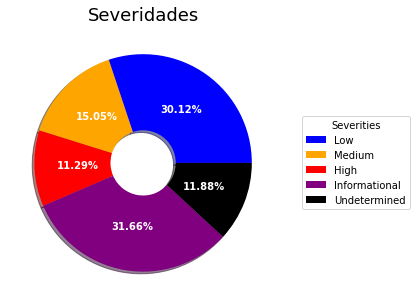

In [5]:
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect='equal'))
wedges, texts, autotexts = ax.pie(severities_count['quantity'],
                           colors=['blue', 'orange', 'red', 'purple', 'black'],
                           shadow=True,
                           wedgeprops=dict(width=0.7),
                           autopct='%.2f%%',
                           textprops=dict(color='w'))
plt.setp(autotexts, size=10, weight='bold')
ax.set_title('Severidades', size=18)
ax.legend(wedges, severities,
          title='Severities',
          loc='right',
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [6]:
auditors_vs_severity = {'auditor': [],
                        'severity':
                            {
                                'Low': [],
                                'Medium': [],
                                'High': [],
                                'Informational': [],
                                'Undetermined': []
                            },
                        'calls': []
                        }
for auditor in auditors:
    script = "SELECT COUNT(*) FROM findings WHERE auditor_id = ?"
    calls = API.execute(script, [auditor['id']])[0][0]
    if calls == 0:
        continue
    auditors_vs_severity['calls'].append(calls)
    auditors_vs_severity['auditor'].append(auditor['name'])

    for severity in auditors_vs_severity['severity']:
        script = f"SELECT COUNT(*) FROM findings WHERE severity = '{severity}' AND auditor_id = ?"
        quantity = API.execute(script, [auditor['id']])[0][0] / calls * 100
        auditors_vs_severity['severity'][severity].append(quantity)

low_mean = np.array(auditors_vs_severity['severity']['Low']).mean()
medium_mean = np.array(auditors_vs_severity['severity']['Medium']).mean()
high_mean = np.array(auditors_vs_severity['severity']['High']).mean()
informational_mean = np.array(auditors_vs_severity['severity']['Informational']).mean()
undetermined_mean = np.array(auditors_vs_severity['severity']['Undetermined']).mean()

print(f"""
Low Severity Mean: {low_mean:.3f}%
Medium Severity Mean: {medium_mean:.3f}%
High Severity Mean: {high_mean:.3f}%
Informational Severity Mean: {informational_mean:.3f}%
Undetermined Severity Mean: {undetermined_mean:.3f}%
""")


Low Severity Mean: 32.674%
Medium Severity Mean: 14.964%
High Severity Mean: 11.114%
Informational Severity Mean: 29.262%
Undetermined Severity Mean: 11.986%



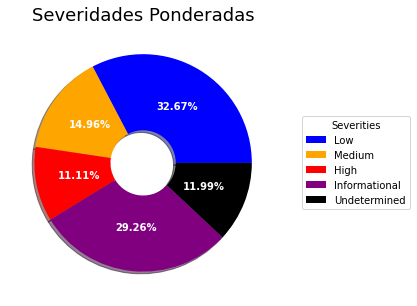

In [7]:
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect='equal'))
wedges, texts, autotexts = ax.pie([low_mean, medium_mean, high_mean, informational_mean, undetermined_mean],
                           colors=['blue', 'orange', 'red', 'purple', 'black'],
                           shadow=True,
                           wedgeprops=dict(width=0.7),
                           autopct='%.2f%%',
                           textprops=dict(color='w'))
plt.setp(autotexts, size=10, weight='bold')
ax.set_title('Severidades Ponderadas', size=18)
ax.legend(wedges, severities,
          title='Severities',
          loc='right',
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

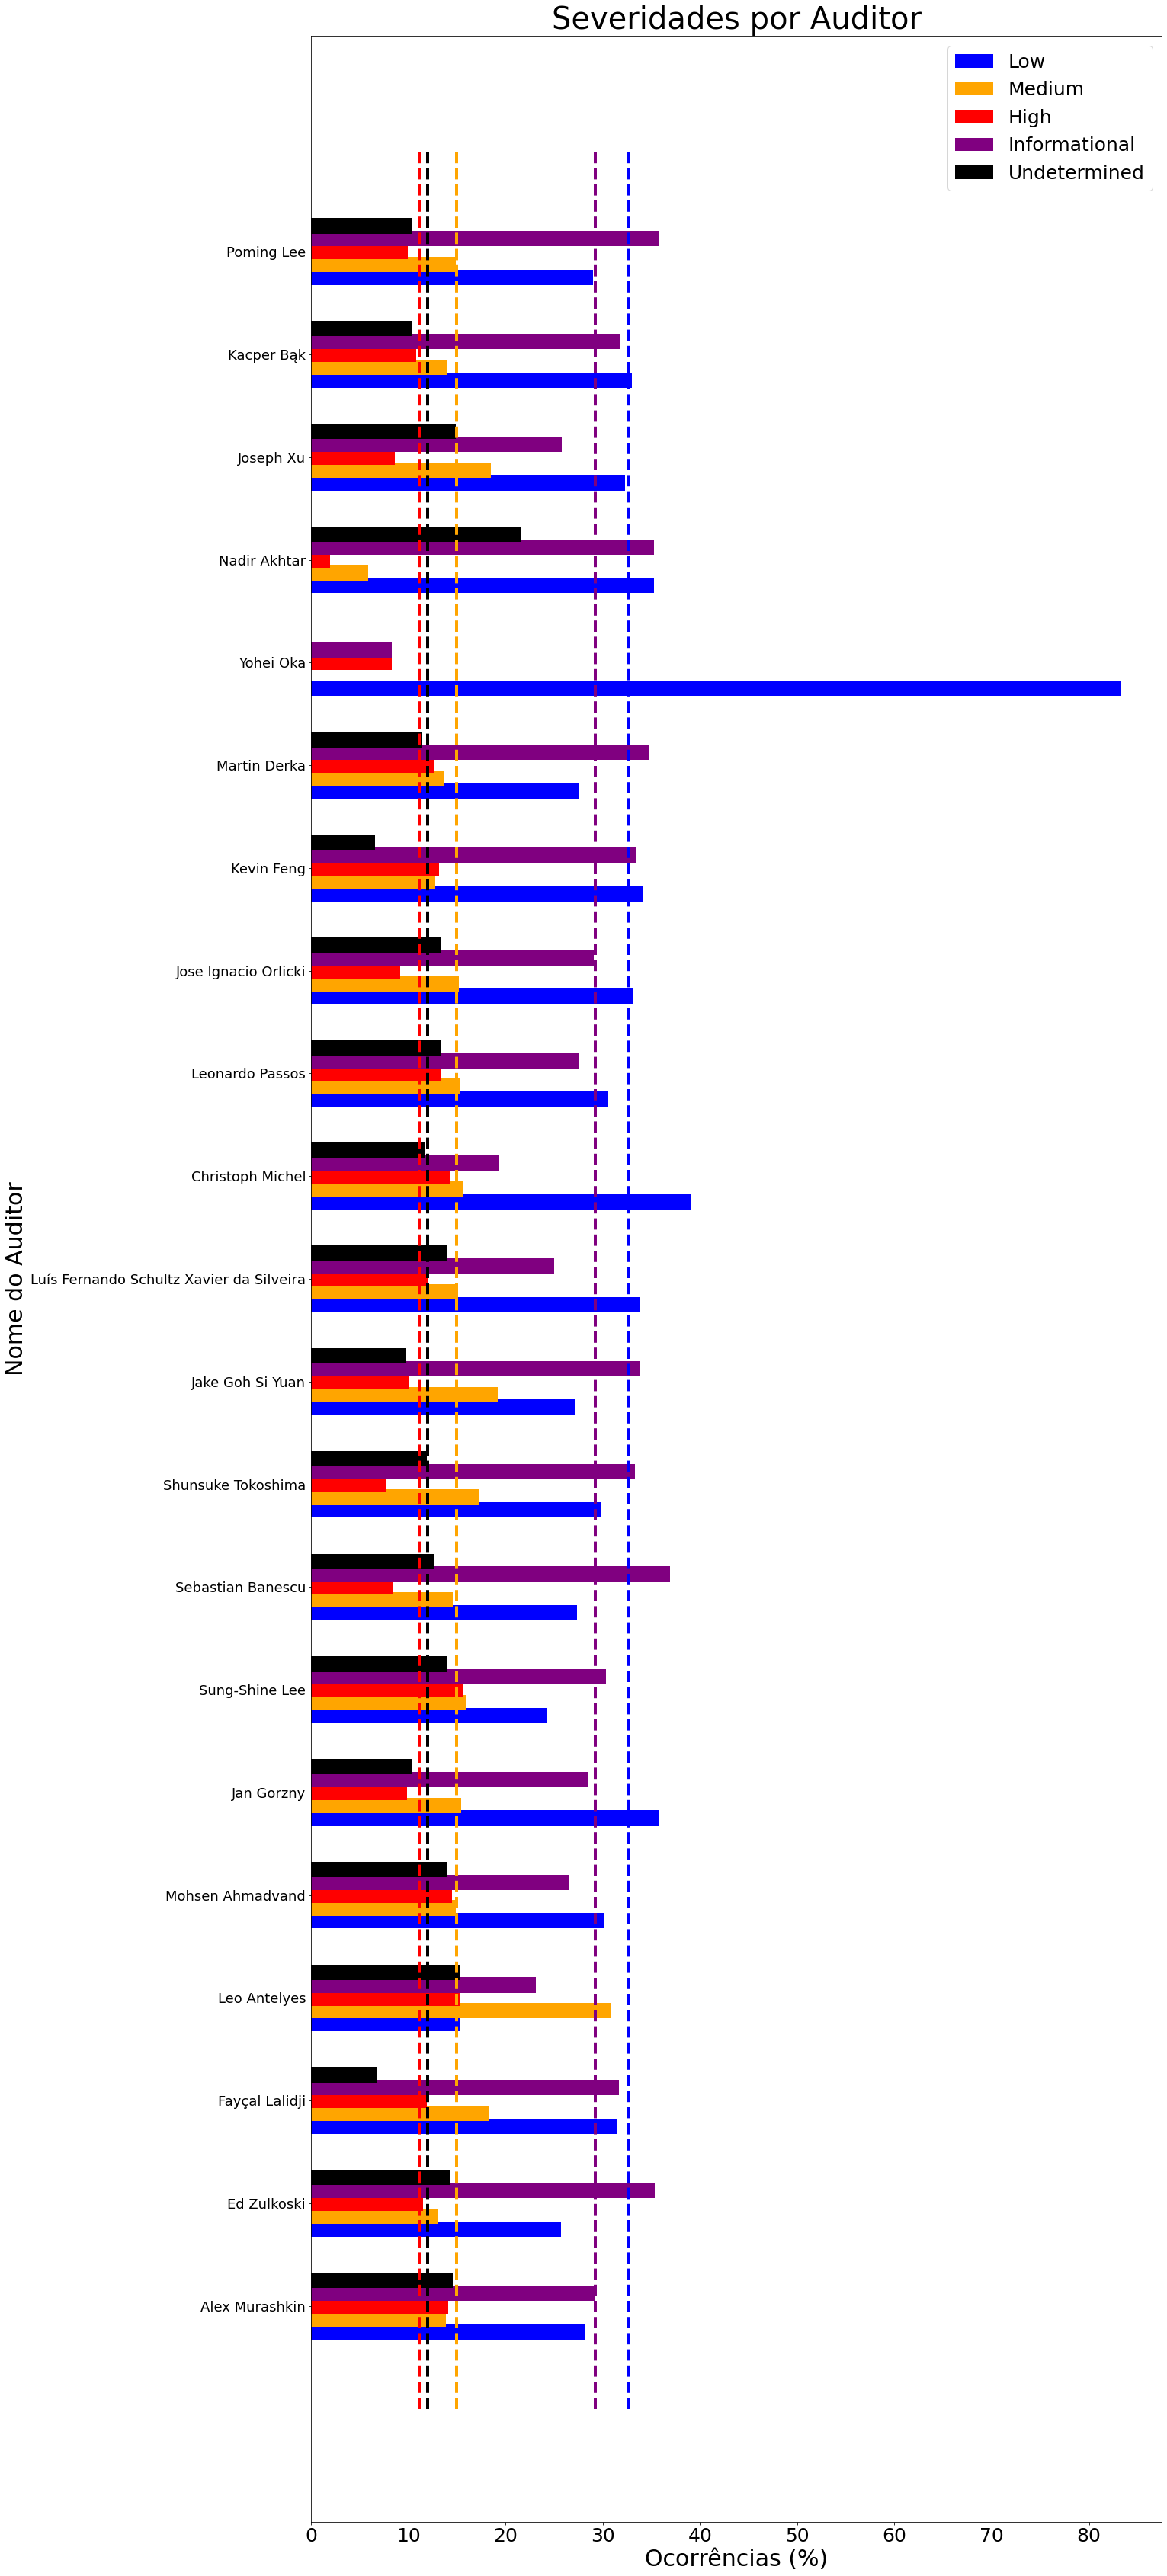

In [8]:
width = 0.15
x = np.arange(len(auditors_vs_severity['auditor']))
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=30)

fig, ax = plt.subplots(figsize=(20, 60))

ax.barh(x - width * 2 / 1.2,
        auditors_vs_severity['severity']['Low'],
        width,
        label='Low',
        color='blue')
ax.barh(x - width / 1.2,
        auditors_vs_severity['severity']['Medium'],
        width,
        label='Medium',
        color='orange')
ax.barh(x,
        auditors_vs_severity['severity']['High'],
        width,
        label='High',
        color='red')
ax.barh(x + width / 1.2,
        auditors_vs_severity['severity']['Informational'],
        width,
        label='Informational',
        color='purple')
ax.barh(x + width * 2 / 1.2,
        auditors_vs_severity['severity']['Undetermined'],
        width,
        label='Undetermined',
        color='black')

ax.set_title('Severidades por Auditor', size=40)
ax.set_xlabel('Ocorrências (%)')
ax.set_ylabel('Nome do Auditor')
ax.set_yticks(x)
ax.set_yticklabels(auditors_vs_severity['auditor'], ha='right')

ax.plot(np.ones(len(x) + 2) * low_mean,
        np.arange(0, len(x) + 2) - 1,
        linestyle='--', linewidth=4,
        color='blue')
ax.plot(np.ones(len(x) + 2) * medium_mean,
        np.arange(0, len(x) + 2) - 1,
        linestyle='--',
        linewidth=4,
        color='orange')
ax.plot(np.ones(len(x) + 2) * high_mean,
        np.arange(0, len(x) + 2) - 1,
        linestyle='--',
        linewidth=4,
        color='red')
ax.plot(np.ones(len(x) + 2) * informational_mean,
        np.arange(0, len(x) + 2) - 1,
        linestyle='--',
        linewidth=4,
        color='purple')
ax.plot(np.ones(len(x) + 2) * undetermined_mean,
        np.arange(0, len(x) + 2) - 1,
        linestyle='--',
        linewidth=4,
        color='black')

ax.legend(fontsize=25)
plt.show()

O valore de ocorrências calculado acima é dado pelo número de ocorrências <em> o </em> dividido pelo número de
auditorias do auditor em questão <em> c </em> multiplicado por 100.

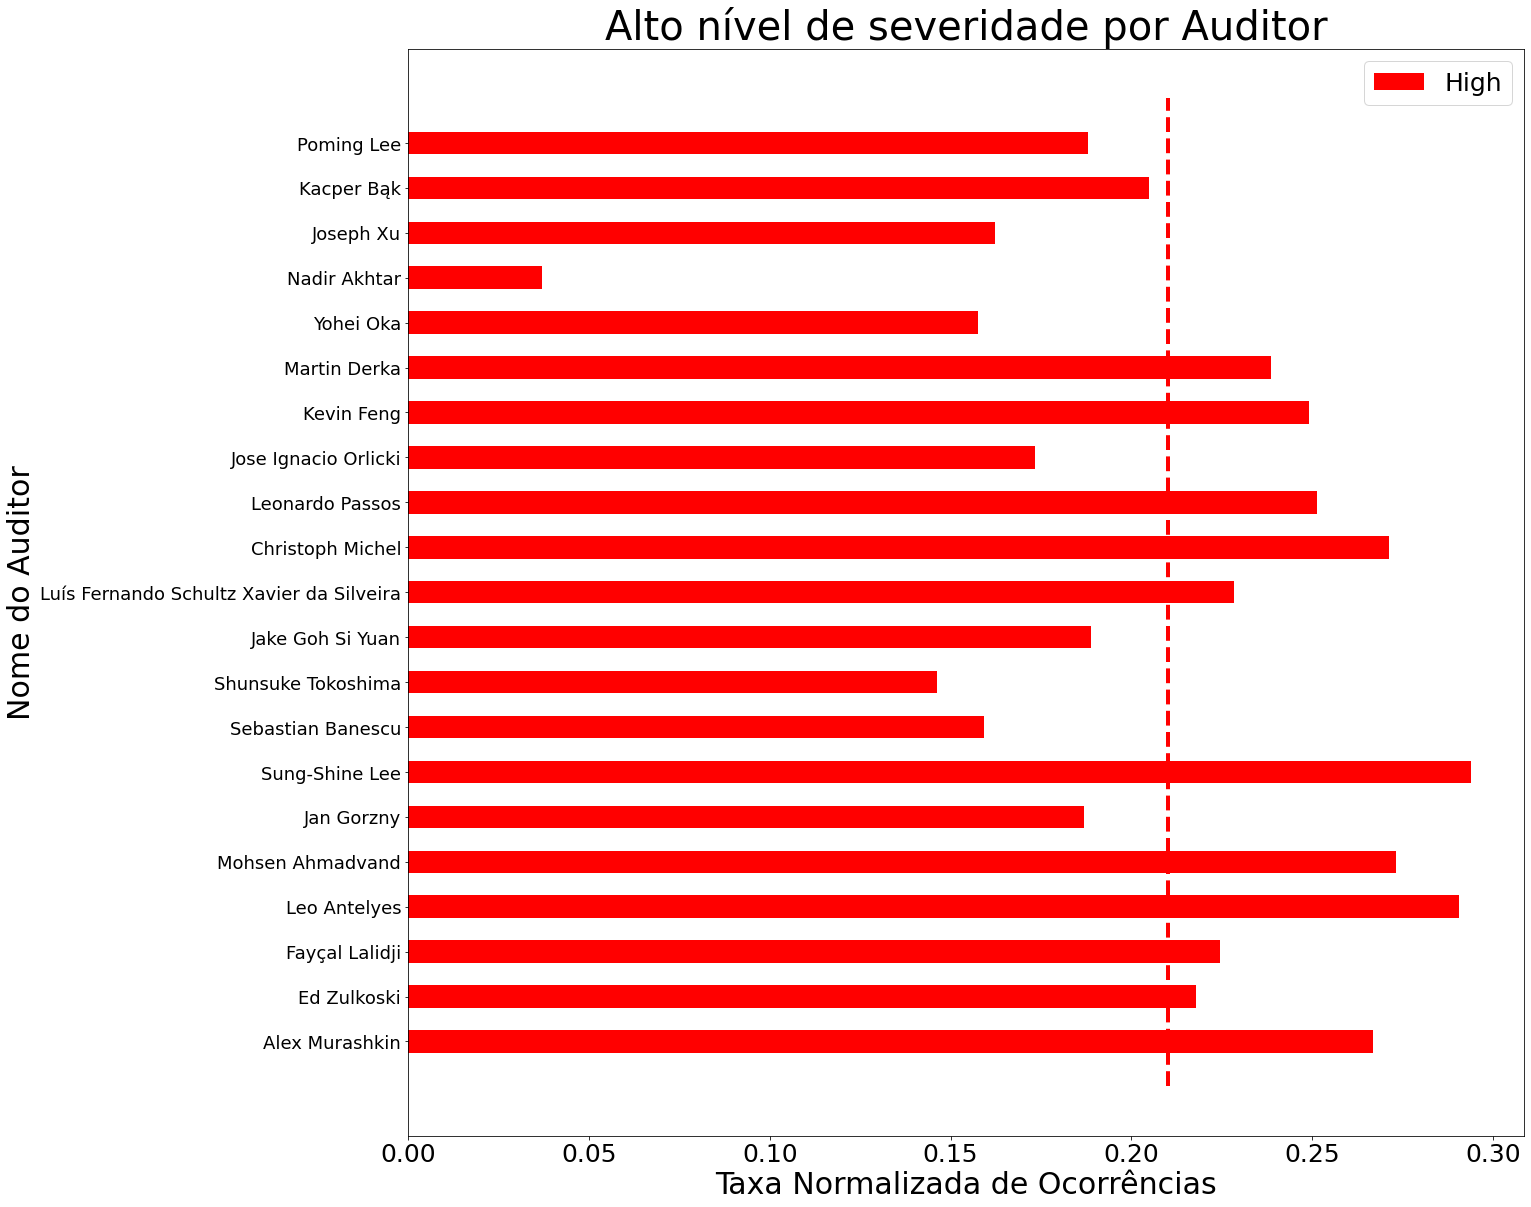

In [9]:
norm = np.linalg.norm(np.array(auditors_vs_severity['severity']['High']))
normalized_high_severity = np.array(auditors_vs_severity['severity']['High']) / norm

width = 0.5
x = np.arange(len(auditors_vs_severity['auditor']))
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=30)

fig, ax = plt.subplots(figsize=(20, 20))

ax.barh(x,
        normalized_high_severity,
        width,
        label='High',
        color='red')

ax.set_title('Alto nível de severidade por Auditor', size=40)
ax.set_xlabel('Taxa Normalizada de Ocorrências')
ax.set_ylabel('Nome do Auditor')
ax.set_yticks(x)
ax.set_yticklabels(auditors_vs_severity['auditor'], ha='right')

ax.plot(np.ones(len(x) + 2) * high_mean / norm,
        np.arange(0, len(x) + 2) - 1,
        linestyle='--',
        linewidth=4,
        color='red')

ax.legend(fontsize=25)
plt.show()

In [10]:
norm = np.linalg.norm(np.array(auditors_vs_severity['calls']))
normalized_calls = np.array(np.array(auditors_vs_severity['calls'])) / norm

df = pd.DataFrame({
    'auditor': auditors_vs_severity['auditor'],
    'High': normalized_high_severity,
    'Calls': normalized_calls
})
df

,auditor,High,Calls
0,Alex Murashkin,0.266842,0.154768
1,Ed Zulkoski,0.217995,0.468961
2,Fayçal Lalidji,0.224527,0.253289
3,Leo Antelyes,0.290734,0.004657
4,Mohsen Ahmadvand,0.273314,0.086699
5,Jan Gorzny,0.186871,0.257230
6,Sung-Shine Lee,0.293964,0.177338
7,Sebastian Banescu,0.159283,0.344287
8,Shunsuke Tokoshima,0.146232,0.060188
9,Jake Goh Si Yuan,0.188977,0.175547


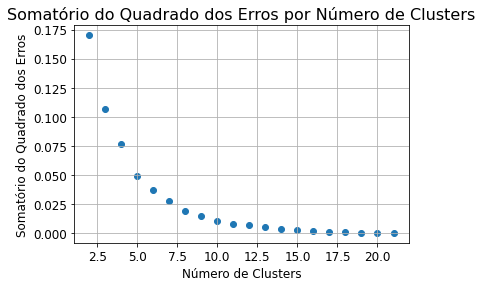

In [25]:
clusters = []
sse = []
for k in range(2, len(auditors)):
    km = KMeans(n_clusters=k)
    clusters.append(km.fit_predict(df[['Calls', 'High']]))
    sse.append(km.inertia_)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

fig, ax = plt.subplots()
ax.scatter(range(2, len(auditors)), sse)

ax.set_title("Somatório do Quadrado dos Erros por Número de Clusters", fontsize=16)
ax.set_xlabel("Número de Clusters")
ax.set_ylabel("Somatório do Quadrado dos Erros")
ax.grid()

plt.show()

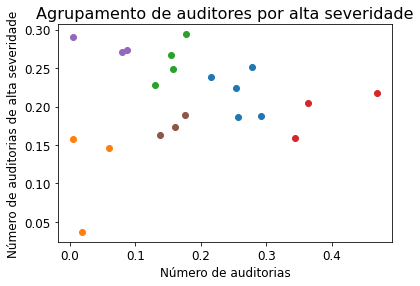

In [27]:
df['Cluster'] = clusters[4]

fig, ax = plt.subplots()

for i in range(6):
    df_scatter = df[df['Cluster'] == i]
    ax.scatter(df_scatter['Calls'], df_scatter['High'])

ax.set_title("Agrupamento de auditores por alta severidade", fontsize=16)
ax.set_xlabel("Número de auditorias")
ax.set_ylabel("Número de auditorias de alta severidade")

plt.show()

Os valores apresentados no gráfico anterior são valores normalizados. Os grupos foram encontrados com o
algoritmo K-means usando K = 6. Esse valor de K foi escolhido com base no gráfico
Somatório do Quadrado dos Erros por Número de Clusters pelo método do cotovelo.

In [28]:
df

,auditor,High,Calls,Cluster
0,Alex Murashkin,0.266842,0.154768,2
1,Ed Zulkoski,0.217995,0.468961,3
2,Fayçal Lalidji,0.224527,0.253289,0
3,Leo Antelyes,0.290734,0.004657,4
4,Mohsen Ahmadvand,0.273314,0.086699,4
5,Jan Gorzny,0.186871,0.257230,0
6,Sung-Shine Lee,0.293964,0.177338,2
7,Sebastian Banescu,0.159283,0.344287,3
8,Shunsuke Tokoshima,0.146232,0.060188,1
9,Jake Goh Si Yuan,0.188977,0.175547,5
